# Neural Networks for Heart Disease Recognition, Multiclass 

In this assignment, you will use a neural network to recognize the heart disease categories 0-4.

## 1 - Packages 

First, let's run the cell below to import all the packages that you will need during this assignment.
- [numpy](https://numpy.org/) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a popular library to plot graphs in Python.
- [tensorflow](https://www.tensorflow.org/) a popular platform for machine learning.

In [14]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
import matplotlib.pyplot as plt



## 2 - ReLU Activation
In our lecture, a new activation was introduced, the Rectified Linear Unit (ReLU). 
$$ a = max(0,z) \quad\quad\text {# ReLU function} $$

An activation value from a hidden layer represents a high-level feature (e.g. size of tumor) which is often not binary but has a continuous range of values. The sigmoid is best for on/off or binary situations. The ReLU provides a continuous linear relationship. Additionally it has an 'off' range where the output is zero.  The "off" feature makes the ReLU a Non-Linear activation. Why is this needed? This enables multiple units to contribute to the resulting function without interfering. 


## 3 - Softmax Function
A multiclass neural network generates N outputs. One output is selected as the predicted answer. In the output layer, a vector $\mathbf{z}$ is generated by a linear function which is fed into a softmax function. The softmax function converts $\mathbf{z}$  into a probability distribution as described below. After applying softmax, each output will be between 0 and 1 and the outputs will sum to 1. They can be interpreted as probabilities. The larger inputs to the softmax will correspond to larger output probabilities.
<center>  <img  src="./images/hw7_NNSoftmax.PNG" width="600" />  

The softmax function can be written:
$$a_j = \frac{e^{z_j}}{ \sum_{k=0}^{N-1}{e^{z_k} }} \tag{1}$$

Where $z = \mathbf{w} \cdot \mathbf{x} + b$ and N is the number of feature/categories in the output layer.  


### Exercise 1
Let's create a NumPy implementation:

In [15]:
def my_softmax(z):  
    """ Softmax converts a vector of values to a probability distribution.
    Args:
      z (ndarray (N,))  : input data, N features
    Returns:
      a (ndarray (N,))  : softmax of z
    """    
    ### START CODE HERE ### 
    n = z.shape[0]
    a = np.zeros(n)
    for i in range(n):
        a_sum = 0
        for k in range(n):
            a_sum += np.exp(z[k])
    
        a[i] = np.exp(z[i]) / a_sum
    ### END CODE HERE ### 
    return a

In [16]:
### test 
z = np.array([1., 2., 3., 4.])
a = my_softmax(z)
atf = tf.nn.softmax(z)
print(f"my_softmax(z):         {a}")
print(f"tensorflow softmax(z): {atf}")


my_softmax(z):         [0.0320586  0.08714432 0.23688282 0.64391426]
tensorflow softmax(z): [0.0320586  0.08714432 0.23688282 0.64391426]


### Expected Output

    my_softmax(z):         [0.0320586  0.08714432 0.23688282 0.64391426]
    tensorflow softmax(z): [0.0320586  0.08714432 0.23688282 0.64391426]



## 4 - Neural Networks

In the last assignment, you implemented a neural network to do binary classification. In this assignment, you will extend that to multiclass classification. This will utilize the softmax activation.



### 4.1 Problem Statement

You will use a neural network to recognize heart disease categories 0-4. This is a multiclass classification task where one of n choices is selected.  



### 4.2 Dataset

You will use a data set from Cleveland Clinic Foundation (i.e., processed.cleveland.data). The data set contains 303 training examples with the following attribute information:

      -- 1. (age)       
      -- 2. (sex)       
      -- 3. (cp)        
      -- 4. (trestbps)  
      -- 5. (chol)      
      -- 6. (fbs)       
      -- 7. (restecg)   
      -- 8. (thalach)   
      -- 9. (exang)     
      -- 10. (oldpeak)   
      -- 11. (slope)     
      -- 12. (ca)        
      -- 13. (thal)      
      -- 14. (num)       (the predicted attribute)

For more detailed information of each attribute, please refer to the attached file (i.e., heart-disease.names). You will start by loading the data set into variables `X` and `y`

- Each training example becomes a single row in our data matrix `X`. 
- This gives us a 303 x 13 matrix `X` where every row is a training example of a heart disease cetegory.

$$X = 
\left(\begin{array}{cc} 
--- (x^{(1)}) --- \\
--- (x^{(2)}) --- \\
\vdots \\ 
--- (x^{(m)}) --- 
\end{array}\right)$$ 

- The second part of the training set is a 303 x 1 dimensional vector y that contains labels (i.e., 0-4) for the training set.

Note that a real data set often has missing data. For the data set being used in this assignment, a missing data item is designated as '?'. A common method for dealing with a missing item is to use the average value of the other data items in the same attribute/feature to replace the missing one. So, your first step is to write a function called 'preprocess_data' that covert string value to float, computes the average value of each attribute (i.e., each column of X), and replaces the missing item (if any) using the average value.

In [17]:

def preprocess_data(X):
    '''
    Proprocess the data so that the missing item is replaced by the average value of each attribute (i.e., each column)
    Args:
        X : (ndarray Shape(m,n)) data with string type
        
    Return: 
        X : (ndarray Shape(m,n)) data with float type - the missing element has been replaced by 
        the average value of each attribute
    '''
    ### START CODE HERE ### 
    m, n = X.shape
    q_mark = []
    
    ## convert everything to doubles and save locations of ?
    for i in range(m):
        for j in range(n):
            if X[i][j] != "?":
                X[i][j] = X[i][j].astype(np.float32)
            else:
                q_mark.append((i, j))
    
    for k in range(len(q_mark)):
        q_counter = 0
        q_sum = 0
        curr_q = q_mark[k]
        curr = X[:, curr_q[1]]
        length = curr.shape[0]
        for l in range(length): 
            if curr[l] == '?':
                q_counter += 1
            else:
                q_sum += float(curr[l])
        X[curr_q[0]][curr_q[1]] = q_sum / (length - q_counter)
        
    X = X.astype(np.float32)    
    for i in range(m):
        for j in range(n):
            if isinstance(X[i][j], str):
                print("string found at: ", i, j)
        
    
    return X
    ### END CODE HERE ###   
    

In [18]:
# Create 2-D numpy array
arr = np.array([['5.0', '9.0', '7.0', '?'], ['8.0', '14.0', '?', '19.0'],['32.0', '24.0', '19.0', '28.0']])

processed_arr = preprocess_data(arr)

print(processed_arr)

[[ 5.   9.   7.  23.5]
 [ 8.  14.  13.  19. ]
 [32.  24.  19.  28. ]]


### Expected Output

    [[ 5.   9.   7.  23.5]
     [ 8.  14.  13.  19. ]
     [32.  24.  19.  28. ]]

Now you need to write a function to load the data, preprocess them, and put them in X and y.

In [19]:
# load dataset

def load_data(filename):
    ### START CODE HERE ### 
    data = np.genfromtxt(filename, delimiter=",", dtype=str)
    X_data = data[:, :13]
    y = data[:, 13]
    X = preprocess_data(X_data)
    for i in range(y.shape[0]):
        y[i] = y[i].astype(np.float32)
    y = y.reshape(y.shape[0], 1)
    y = y.astype(np.float32)
    
    ### END CODE HERE ### 

    return X, y

In [20]:
X, y = load_data("./data/processed.cleveland.data")

#### 4.2.1 View the variables
Let's get more familiar with your dataset.  
- A good place to start is to print out each variable and see what it contains.

The code below prints the first element in the variables `X`.  

In [21]:
print ('The first element of X is: ', X[0])

The first element of X is:  [ 63.    1.    1.  145.  233.    1.    2.  150.    0.    2.3   3.    0.
   6. ]


In [22]:
print ('The first element of y is: ', y[0,0])
print ('The second element of y is: ', y[1,0])

The first element of y is:  0.0
The second element of y is:  2.0


#### 4.2.2 Check the dimensions of your variables

Another way to get familiar with your data is to view its dimensions. Please print the shape of `X` and `y` and see how many training examples you have in your dataset.

In [23]:
print ("The shape of X is: ", X.shape)        # ADD CODE 
print ("The shape of y is: ", y.shape)        # ADD CODE 

The shape of X is:  (303, 13)
The shape of y is:  (303, 1)


### Expected Output

    The shape of X is: (303, 13)
    The shape of y is: (303, 1)


Tile/copy our data to increase the training set size and reduce the number of training epochs.

In [24]:
X = np.tile(X,(100,1))
y = np.tile(y,(100,1))   

print(X.shape, y.shape) 

(30300, 13) (30300, 1)


### Expected Output
    (30300, 13) (30300, 1)


### 4.3 Model representation

The neural network you will use in this assignment is shown in the figure below. 
- This has two dense layers with ReLU activations followed by an output layer with a linear activation. 
    
<img src="images/hw7_NNModel.png" width="600" height="450">

- The parameters have dimensions that are sized for a neural network with $25$ units in layer 1, $15$ units in layer 2, and $5$ output units in layer 3, one for each heart disease category.

    - Recall that the dimensions of these parameters is determined as follows:
        - If network has $s_{in}$ units in a layer and $s_{out}$ units in the next layer, then 
            - $W$ will be of dimension $s_{in} \times s_{out}$.
            - $b$ will be a vector with $s_{out}$ elements
  
    - Therefore, the shapes of `W`, and `b`,  are 
        - layer1: The shape of `W1` is (13, 25) and the shape of `b1` is (25,)
        - layer2: The shape of `W2` is (25, 15) and the shape of `b2` is: (15,)
        - layer3: The shape of `W3` is (15, 5) and the shape of `b3` is: (5,)
>**Note:** The bias vector `b` could be represented as a 1-D (n,) or 2-D (n,1) array. Tensorflow utilizes a 1-D representation and this assignment will maintain that convention: 
               

<a name="4.4"></a>
### 4.4 Tensorflow Model Implementation


Tensorflow models are built layer by layer. A layer's input dimensions ($s_{in}$ above) are calculated for you. You specify a layer's *output dimensions* and this determines the next layer's input dimension. The input dimension of the first layer is derived from the size of the input data specified in the `model.fit` statement below. 
>**Note:** It is also possible to add an input layer that specifies the input dimension of the first layer. For example:  
`tf.keras.Input(shape=(13,)),    #specify input shape`  
We will include that here to illuminate some model sizing.


### 4.5 Softmax placement
As described in the lecture, numerical stability is improved if the softmax is grouped with the loss function rather than the output layer during training. This has implications when *building* the model and *using* the model.  
Building:  
* The final Dense layer should use a 'linear' activation. This is effectively no activation. 
* The `model.compile` statement will indicate this by including `from_logits=True`.
`loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) `  
* This does not impact the form of the target. In the case of SparseCategorialCrossentropy, the target is the expected category, 0-4.

Using the model:
* The outputs are not probabilities. If output probabilities are desired, apply a softmax function.

### Exercise 2

Below, using Keras [Sequential model](https://keras.io/guides/sequential_model/) and [Dense Layer](https://keras.io/api/layers/core_layers/dense/) with a ReLU activation to construct the three layer network described above.

In [25]:
tf.random.set_seed(1234) # for consistent results
model = Sequential(
    [      
        tf.keras.Input(shape=(13,)),    #specify input size
        ### START CODE HERE ### 
        tf.keras.layers.Dense(units=25, activation="relu"),
        tf.keras.layers.Dense(units=15, activation="relu"),
        tf.keras.layers.Dense(units=5, activation="linear")
        
        
        ### END CODE HERE ### 
    ], name = "my_model" 
)

In [26]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                350       
                                                                 
 dense_1 (Dense)             (None, 15)                390       
                                                                 
 dense_2 (Dense)             (None, 5)                 80        
                                                                 
Total params: 820
Trainable params: 820
Non-trainable params: 0
_________________________________________________________________


<details>
  <summary><font size="3" color="darkgreen"><b>Expected Output (Click to expand)</b></font></summary>
The `model.summary()` function displays a useful summary of the model. Note, the names of the layers may vary as they are auto-generated unless the name is specified.    
    
```
Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
L1 (Dense)                   (None, 25)                350     
_________________________________________________________________
L2 (Dense)                   (None, 15)                390       
_________________________________________________________________
L3 (Dense)                   (None, 5)                 80       
=================================================================
Total params: 820
Trainable params: 820
Non-trainable params: 0
_________________________________________________________________
```

The parameter counts shown in the summary correspond to the number of elements in the weight and bias arrays as shown below.

Let's further examine the weights to verify that tensorflow produced the same dimensions as we calculated above.

In [27]:
[layer1, layer2, layer3] = model.layers

In [28]:
#### Examine Weights shapes
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (13, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 5), b3 shape = (5,)


**Expected Output**
```
W1 shape = (13, 25), b1 shape = (25,)  
W2 shape = (25, 15), b2 shape = (15,)  
W3 shape = (15, 5), b3 shape = (5,)
```

The following code:
* defines a loss function, `SparseCategoricalCrossentropy` and indicates the softmax should be included with the  loss calculation by adding `from_logits=True`)
* defines an optimizer. A popular choice is Adaptive Moment (Adam) which was described in lecture.

In [29]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

history = model.fit(          
    X,y,
    epochs=100
)

Epoch 1/100
947/947 [==============================] - 2s 2ms/step - loss: 2.3982
Epoch 2/100
947/947 [==============================] - 1s 1ms/step - loss: 1.0381
Epoch 3/100
947/947 [==============================] - 1s 1ms/step - loss: 0.9669
Epoch 4/100
947/947 [==============================] - 1s 1ms/step - loss: 0.9175
Epoch 5/100
947/947 [==============================] - 1s 1ms/step - loss: 0.8941
Epoch 6/100
947/947 [==============================] - 1s 1ms/step - loss: 0.8803
Epoch 7/100
947/947 [==============================] - 1s 1ms/step - loss: 0.8861
Epoch 8/100
947/947 [==============================] - 1s 1ms/step - loss: 0.8609
Epoch 9/100
947/947 [==============================] - 1s 1ms/step - loss: 0.8613
Epoch 10/100
947/947 [==============================] - 1s 1ms/step - loss: 0.8500
Epoch 11/100
947/947 [==============================] - 1s 1ms/step - loss: 0.8439
Epoch 12/100
947/947 [==============================] - 1s 1ms/step - loss: 0.8213
Epoch 13/100


947/947 [==============================] - 1s 1ms/step - loss: 0.2516
Epoch 100/100
947/947 [==============================] - 1s 1ms/step - loss: 0.2505


**I cannot for the life of me figure out what is going wrong here. As you can see in my process data function I tested to see if there were any strings in my data and there isn't, so I have no clue what Keras' problem is with my data. I also unfortunately don't have time to figure out what the issue is here.**

#### Epochs and batches
In the `compile` statement above, the number of `epochs` was set to 100. This specifies that the entire data set should be applied during training 100 times.  During training, you see output describing the progress of training that looks like this:
```
Epoch 1/100
947/947 [==============================] - 0s 1ms/step - loss: 2.6479
```
The first line, `Epoch 1/100`, describes which epoch the model is currently running. For efficiency, the training data set is broken into 'batches'. The default size of a batch in Tensorflow is 32. There are 30300 examples in our extended data set or roughly 947 batches. The notation on the 2nd line `947/947 [====` is describing which batch has been executed.

#### Loss  (cost)
In the previous lectures, we learned to track the progress of gradient descent by monitoring the cost. Ideally, the cost will decrease as the number of iterations of the algorithm increases. Tensorflow refers to the cost as `loss`. Above, you saw the loss displayed each epoch as `model.fit` was executing. The [.fit](https://www.tensorflow.org/api_docs/python/tf/keras/Model) method returns a variety of metrics including the loss. This is captured in the `history` variable above. This can be used to examine the loss in a plot as shown below.

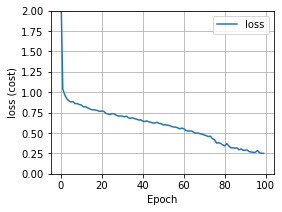

In [30]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'           # to support higher OS versions 
fig,ax = plt.subplots(1,1, figsize = (4,3))
ax.plot(history.history['loss'], label='loss')
ax.set_ylim([0, 2])
ax.set_xlabel('Epoch')
ax.set_ylabel('loss (cost)')
ax.legend()
ax.grid(True)
plt.show()

#### Prediction 
To make a prediction, use Keras `predict`. Below, X[0] contains an training example with category 0.

In [31]:
first_patient = X[0]

prediction = model.predict(first_patient.reshape(1,13))  # prediction

print(f" predicting a category Zero: \n{prediction}")
print(f" Largest Prediction index: {np.argmax(prediction)}")

1/1 [==============================] - 0s 85ms/step
 predicting a category Zero: 
[[  7.497116    1.0880412 -30.222107  -40.46015   -29.323692 ]]
 Largest Prediction index: 0


The largest output is prediction[0], indicating the predicted category is a '0'. If the problem only requires a selection, that is sufficient. Use NumPy [argmax](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html) to select it. If the problem requires a probability, a softmax is required:

In [32]:
prediction_p = tf.nn.softmax(prediction)

print(f" predicting a Zero. Probability vector: \n{prediction_p}")
print(f"Total of predictions: {np.sum(prediction_p):0.3f}")

 predicting a Zero. Probability vector: 
[[9.9835616e-01 1.6438406e-03 4.1498755e-17 1.4849396e-21 1.0190878e-16]]
Total of predictions: 1.000


To return an integer representing the predicted target, you want the index of the largest probability. This is accomplished with the Numpy [argmax](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html) function.

In [33]:
yhat = np.argmax(prediction_p)

print(f"np.argmax(prediction_p): {yhat}")

np.argmax(prediction_p): 0


In [34]:
f = model.predict(X)
yhat = np.argmax(f, axis=1)
print('Train Accuracy: %f'%(np.mean(yhat == y[:,0]) * 100))


947/947 [==============================] - 1s 737us/step
Train Accuracy: 92.079208
